# Notes to self - steps tomorrow:
* START SIMPLE - get minimum tutorial up
* Create a 4-5 variable dataset
* Format X, y
* Train/test split, score, plot
* K-fold
* Logistic regression, ROC curve, random forest

In [1]:
####################################################
# Boilerplate import/setup code for general analysis
# everett.wetchler@gmail.com
####################################################

# Plot directly in notebook
# NOTE: break this command into it's own cell, and run
# it BEFORE everything below it. Unfortunately that's
# the only way to get the plot settings to stick.
%matplotlib inline

Everett Wetchler 2019-07-26 07:30:21 PDT

CPython 3.7.3
IPython 5.8.0

numpy 1.16.4
pandas 0.24.1
matplotlib 2.2.3
seaborn 0.9.0
watermark 1.8.1


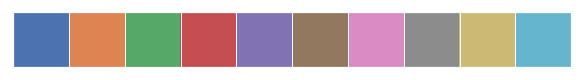

In [2]:
import datetime as dt
import os
import random
import simplejson as json

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Customize default chart graphics
mpl.rcParams.update({
  'font.size': 14,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'xtick.labelsize': 'medium',
  'ytick.labelsize': 'medium',
  'legend.fancybox': True,
  'legend.fontsize': 'medium',
  'legend.frameon': True,
  'legend.framealpha': 0.7,
  'figure.figsize': ['9', '6'],
})

# It's useful to have some named colors handy
(SNS_BLUE, SNS_ORANGE, SNS_GREEN,
 SNS_RED, SNS_PURPLE, SNS_BROWN,
 SNS_PINK, SNS_GRAY, SNS_YELLOW,
 SNS_CYAN) = sns.color_palette()
sns.palplot(sns.color_palette())

# Watermark extension to print version/system information
# Flags:
# -a [author] --v (python/ipython versions) -d (date)
# -t (time) -z (timezone) -r (repo)
# -g (git hash) -w (watermark version)
# -p [packages] (package info)
%load_ext watermark
%watermark -a 'Everett Wetchler' -v -d -t -z -w -p numpy,pandas,matplotlib,seaborn

####################################################
# END Boilerplate
####################################################

# Country Happiness Data

In [3]:
hap = pd.read_csv('data/happiness.csv')
print(hap.shape)
hap.head()

(1704, 4)


,Entity,Code,Year,World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))
0,Afghanistan,AFG,2008,3.723590
1,Afghanistan,AFG,2009,4.401778
2,Afghanistan,AFG,2010,4.758381
3,Afghanistan,AFG,2011,3.831719
4,Afghanistan,AFG,2012,3.782938


In [4]:
hap.columns = ['country', 'code', 'year', 'happiness']
hap.drop(columns='code', inplace=True)
hap.head()

,country,year,happiness
0,Afghanistan,2008,3.723590
1,Afghanistan,2009,4.401778
2,Afghanistan,2010,4.758381
3,Afghanistan,2011,3.831719
4,Afghanistan,2012,3.782938


In [5]:
print(f"Before: {len(hap)} rows with {len(set(hap['country']))} unique countries")
hap = hap[hap['year'] >= 2005]
hap = hap[hap['year'] <= 2015]
print(f"After:  {len(hap)} rows with {len(set(hap['country']))} unique countries")

Before: 1704 rows with 164 unique countries
After:  1279 rows with 163 unique countries


In [6]:
# This returns a *series*, which is a one-dimensional array
s = hap.groupby('country')['happiness'].mean()
# We can easily convert back to a Dataframe:
hap = pd.DataFrame(s)
hap.head()

,happiness
country,
Afghanistan,3.898032
Albania,5.092158
Algeria,5.685064
Angola,4.420299
Argentina,6.440702


In [7]:
# Save the file
# Note: We're leaving index=True (the default) to save the 'country' values
hap.to_csv('data/happiness_cleaned.csv')

# World Indicators Data
```
Id
Human Development Index HDI-2014
Gini coefficient 2005-2013
Adolescent birth rate 15-19 per 100k 20102015
Birth registration funder age 5 2005-2013
Carbon dioxide emissionsAverage annual growth
Carbon dioxide emissions per capita 2011 Tones
Change forest percentable 1900 to 2012
Change mobile usage 2009 2014
Consumer price index 2013
Domestic credit provided by financial sector 2013
Domestic food price level 2009 2014 index
Domestic food price level 2009-2014 volitility index
Electrification rate or population
Expected years of schooling - Years
Exports and imports percentage GPD 2013
Female Suicide Rate 100k people
Foreign direct investment net inflows percentage GDP 2013
Forest area percentage of total land area 2012
Fossil fuels percentage of total 2012
Fresh water withdrawals 2005
Gender Inequality Index 2014
General government final consumption expenditure - Annual growth 2005 2013
General government final consumption expenditure - Perce of GDP 2005-2013
Gross domestic product GDP 2013
Gross domestic product GDP percapta
Gross fixed capital formation of GDP 2005-2013
Gross national income GNI per capita - 2011 Dollars
Homeless people due to natural disaster 2005 2014 per million people
Homicide rate per 100k people 2008-2012
Infant Mortality 2013 per thousands
International inbound tourists thausands 2013
International student mobility of total tetiary enrolvemnt 2013
Internet users percentage of population 2014
Intimate or nonintimate partner violence ever experienced 2001-2011
Life expectancy at birth- years
MaleSuicide Rate 100k people
Maternal mortality ratio deaths per 100 live births 2013
Mean years of schooling - Years
Mobile phone subscriptions per 100 people 2014
Natural resource depletion
Net migration rate per 1k people 2010-2015
Physicians per 10k people
Population affected by natural desasters average annual per million people 2005-2014
Population living on degraded land Percentage 2010
Population with at least some secondary education percent 2005-2013
Pre-primary 2008-2014
Primary-2008-2014
Primary school dropout rate 2008-2014
Prison population per 100k people
Private capital flows percentage GDP 2013
Public expenditure on education Percentange GDP
Public health expenditure percentage of GDP 2013
Pupil-teacher ratio primary school pupils per teacher 2008-2014
Refugees by country of origin
Remittances inflows percentual GDP 2013
Renewable sources percentage of total 2012
Research and development expenditure 2005-2012
Secondary 2008-2014
Share of seats in parliament percentage held by womand 2014
Stock of immigrants percentage of population 2013
Taxes on income profit and capital gain 205 2013
Tertiary -2008-2014
Total tax revenue of GDP 2005-2013
Tuberculosis rate per thousands 2012
Under-five Mortality 2013 thousands```

In [8]:
wi = pd.read_csv('data/world_indicators.csv')
print(wi.shape)
wi.head()

(188, 66)


,Id,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,Domestic credit provided by financial sector 2013,Domestic food price level 2009 2014 index,Domestic food price level 2009-2014 volitility index,Electrification rate or population,Expected years of schooling - Years,Exports and imports percentage GPD 2013,Female Suicide Rate 100k people,Foreign direct investment net inflows percentage GDP 2013,Forest area percentage of total land area 2012,Fossil fuels percentage of total 2012,Fresh water withdrawals 2005,Gender Inequality Index 2014,General government final consumption expenditure - Annual growth 2005 2013,General government final consumption expenditure - Perce of GDP 2005-2013,Gross domestic product GDP 2013,Gross domestic product GDP percapta,Gross fixed capital formation of GDP 2005-2013,Gross national income GNI per capita - 2011 Dollars,Homeless people due to natural disaster 2005 2014 per million people,Homicide rate per 100k people 2008-2012,Infant Mortality 2013 per thousands,International inbound tourists thausands 2013,International student mobility of total tetiary enrolvemnt 2013,Internet users percentage of population 2014,Intimate or nonintimate partner violence ever experienced 2001-2011,Life expectancy at birth- years,MaleSuicide Rate 100k people,Maternal mortality ratio deaths per 100 live births 2013,Mean years of schooling - Years,Mobile phone subscriptions per 100 people 2014,Natural resource depletion,Net migration rate per 1k people 2010-2015,Physicians per 10k people,Population affected by natural desasters average annual per million people 2005-2014,Population living on degraded land Percentage 2010,Population with at least some secondary education percent 2005-2013,Pre-primary 2008-2014,Primary-2008-2014,Primary school dropout rate 2008-2014,Prison population per 100k people,Private capital flows percentage GDP 2013,Public expenditure on education Percentange GDP,Public health expenditure percentage of GDP 2013,Pupil-teacher ratio primary school pupils per teacher 2008-2014,Refugees by country of origin,Remittances inflows percentual GDP 2013,Renewable sources percentage of total 2012,Research and development expenditure 2005-2012,Secondary 2008-2014,Share of seats in parliament percentage held by womand 2014,Stock of immigrants percentage of population 2013,Taxes on income profit and capital gain 205 2013,Tertiary -2008-2014,Total tax revenue of GDP 2005-2013,Tuberculosis rate per thousands 2012,Under-five Mortality 2013 thousands
0,Norway,0.943877,26.83,7.834,100.0,0.778925,9.192879,11.914567,5.22,104.194175,86.956222,1.51,11.3,100.0,17.49259,67.03594,5.2,0.512555,27.973433,57.271805,0.750000,0.067443,1.815164,21.852720,317.497587,62448.01762,22.644476,64992.34046,0.00000,2.2,2.3,4963.0,-3.37449,96.30,26.800000,81.6,13.0,4.0,12.631000,116.51,9.019499,6.0,37.39,12.347838,0.186818,97.05961,98.85057,99.43699,1.511550,72.0,11.467400,6.55284,9.573011,9.590637,0.013,0.154407,47.752676,1.65474,111.06130,39.644970,13.772622,31.798391,74.10112,27.288097,0.14,2.8
1,Australia,0.934958,34.01,12.059,100.0,1.090351,16.519210,-4.561812,30.27,107.789440,158.840776,1.36,6.3,100.0,20.22107,40.99572,5.2,3.330412,19.193731,95.367798,3.930000,0.110130,-0.017410,17.746742,990.721004,42831.06163,28.327407,42260.61295,33.40662,1.1,3.4,6382.0,17.13209,84.56,39.900000,82.4,16.1,6.0,12.963381,131.23,3.819851,6.5,32.73,1337.393551,8.984550,94.44895,107.77737,104.83840,6.118623,130.0,-6.789013,5.11041,8.998704,12.303007,0.025,0.157953,4.632202,2.38562,135.53543,30.530973,27.711793,65.333748,86.33409,21.361426,0.19,4.0
2,Switzerland,0.929613,32.35,1.900,100.0,-1.101254,4.625230,8.567416,16.72,99.317229,173.429316,1.35,6.6,100.0,15.79043,132.182

In [9]:
merged = pd.merge(hap, wi, left_index=True, right_on='Id')
merged.head()

,happiness,Id,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,Domestic credit provided by financial sector 2013,Domestic food price level 2009 2014 index,Domestic food price level 2009-2014 volitility index,Electrification rate or population,Expected years of schooling - Years,Exports and imports percentage GPD 2013,Female Suicide Rate 100k people,Foreign direct investment net inflows percentage GDP 2013,Forest area percentage of total land area 2012,Fossil fuels percentage of total 2012,Fresh water withdrawals 2005,Gender Inequality Index 2014,General government final consumption expenditure - Annual growth 2005 2013,General government final consumption expenditure - Perce of GDP 2005-2013,Gross domestic product GDP 2013,Gross domestic product GDP percapta,Gross fixed capital formation of GDP 2005-2013,Gross national income GNI per capita - 2011 Dollars,Homeless people due to natural disaster 2005 2014 per million people,Homicide rate per 100k people 2008-2012,Infant Mortality 2013 per thousands,International inbound tourists thausands 2013,International student mobility of total tetiary enrolvemnt 2013,Internet users percentage of population 2014,Intimate or nonintimate partner violence ever experienced 2001-2011,Life expectancy at birth- years,MaleSuicide Rate 100k people,Maternal mortality ratio deaths per 100 live births 2013,Mean years of schooling - Years,Mobile phone subscriptions per 100 people 2014,Natural resource depletion,Net migration rate per 1k people 2010-2015,Physicians per 10k people,Population affected by natural desasters average annual per million people 2005-2014,Population living on degraded land Percentage 2010,Population with at least some secondary education percent 2005-2013,Pre-primary 2008-2014,Primary-2008-2014,Primary school dropout rate 2008-2014,Prison population per 100k people,Private capital flows percentage GDP 2013,Public expenditure on education Percentange GDP,Public health expenditure percentage of GDP 2013,Pupil-teacher ratio primary school pupils per teacher 2008-2014,Refugees by country of origin,Remittances inflows percentual GDP 2013,Renewable sources percentage of total 2012,Research and development expenditure 2005-2012,Secondary 2008-2014,Share of seats in parliament percentage held by womand 2014,Stock of immigrants percentage of population 2013,Taxes on income profit and capital gain 205 2013,Tertiary -2008-2014,Total tax revenue of GDP 2005-2013,Tuberculosis rate per thousands 2012,Under-five Mortality 2013 thousands
170,3.898032,Afghanistan,0.465264,27.820000,86.844,37.0,3.344787,0.420933,0.000000,97.61,127.192430,-3.865848,5.990000,6.866667,43.0,9.27439,55.40837,5.3,0.293467,2.067825,48.988691,5.750000,0.693350,13.395378,12.270599,57.552123,1883.763321,17.732438,1885.329070,161.269190,6.5,70.2,785.833333,-5.825500,6.39,46.433333,60.4,6.2,400.0,3.230000,74.88,1.210583,-2.6,2.34,17311.227890,11.023427,18.17000,0.70765,105.85978,46.795007,76.0,-0.033878,5.596007,8.099593,44.67743,2690.775,2.646638,76.346586,0.369710,54.31084,27.635328,0.343975,3.723816,3.74394,7.471639,37.00,97.3
84,5.092158,Albania,0.732766,28.960000,15.297,99.0,-0.280486,1.607038,-1.898606,34.90,107.597235,66.894098,6.430000,10.300000,100.0,11.82000,87.93716,5.2,9.701772,28.248905,60.526896,4.340000,0.217396,0.061768,10.689215,28.860491,10405.351490,26.150462,9942.855635,7.103504,5.0,13.3,2857.000000,-12.141320,60.10,43.766667,77.8,6.6,21.0,9.255581,105.47,3.533721,-3.2,11.45,20567.799770,5.739704,84.76527,70.59945,99.51508,1.332960,158.0,-8.312282,3.268680,5.882328,19.12103,10.520,8.464771,26.563834,0.153080,82.39508,20.714286,3.050417,18.683431,55.50096,19.630699,0.31,14.9
82,5.685064,Algeria,0.735624,38.816667,10.033,99.0

In [10]:
print(f"We have indicator data for {len(wi)} countries,")
print(f"        happiness data for {len(hap)} countries,")
print(f"       and merged data for {len(merged)} countries")

We have indicator data for 188 countries,
        happiness data for 163 countries,
       and merged data for 155 countries


In [11]:
merged.rename(columns={'Id': 'country'}, inplace=True)
merged.set_index('country', inplace=True)
merged.head()

,happiness,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,Domestic credit provided by financial sector 2013,Domestic food price level 2009 2014 index,Domestic food price level 2009-2014 volitility index,Electrification rate or population,Expected years of schooling - Years,Exports and imports percentage GPD 2013,Female Suicide Rate 100k people,Foreign direct investment net inflows percentage GDP 2013,Forest area percentage of total land area 2012,Fossil fuels percentage of total 2012,Fresh water withdrawals 2005,Gender Inequality Index 2014,General government final consumption expenditure - Annual growth 2005 2013,General government final consumption expenditure - Perce of GDP 2005-2013,Gross domestic product GDP 2013,Gross domestic product GDP percapta,Gross fixed capital formation of GDP 2005-2013,Gross national income GNI per capita - 2011 Dollars,Homeless people due to natural disaster 2005 2014 per million people,Homicide rate per 100k people 2008-2012,Infant Mortality 2013 per thousands,International inbound tourists thausands 2013,International student mobility of total tetiary enrolvemnt 2013,Internet users percentage of population 2014,Intimate or nonintimate partner violence ever experienced 2001-2011,Life expectancy at birth- years,MaleSuicide Rate 100k people,Maternal mortality ratio deaths per 100 live births 2013,Mean years of schooling - Years,Mobile phone subscriptions per 100 people 2014,Natural resource depletion,Net migration rate per 1k people 2010-2015,Physicians per 10k people,Population affected by natural desasters average annual per million people 2005-2014,Population living on degraded land Percentage 2010,Population with at least some secondary education percent 2005-2013,Pre-primary 2008-2014,Primary-2008-2014,Primary school dropout rate 2008-2014,Prison population per 100k people,Private capital flows percentage GDP 2013,Public expenditure on education Percentange GDP,Public health expenditure percentage of GDP 2013,Pupil-teacher ratio primary school pupils per teacher 2008-2014,Refugees by country of origin,Remittances inflows percentual GDP 2013,Renewable sources percentage of total 2012,Research and development expenditure 2005-2012,Secondary 2008-2014,Share of seats in parliament percentage held by womand 2014,Stock of immigrants percentage of population 2013,Taxes on income profit and capital gain 205 2013,Tertiary -2008-2014,Total tax revenue of GDP 2005-2013,Tuberculosis rate per thousands 2012,Under-five Mortality 2013 thousands
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.898032,0.465264,27.820000,86.844,37.0,3.344787,0.420933,0.000000,97.61,127.192430,-3.865848,5.990000,6.866667,43.0,9.27439,55.40837,5.3,0.293467,2.067825,48.988691,5.750000,0.693350,13.395378,12.270599,57.552123,1883.763321,17.732438,1885.329070,161.269190,6.5,70.2,785.833333,-5.825500,6.39,46.433333,60.4,6.2,400.0,3.230000,74.88,1.210583,-2.6,2.34,17311.227890,11.023427,18.17000,0.70765,105.85978,46.795007,76.0,-0.033878,5.596007,8.099593,44.67743,2690.775,2.646638,76.346586,0.369710,54.31084,27.635328,0.343975,3.723816,3.74394,7.471639,37.00,97.3
Albania,5.092158,0.732766,28.960000,15.297,99.0,-0.280486,1.607038,-1.898606,34.90,107.597235,66.894098,6.430000,10.300000,100.0,11.82000,87.93716,5.2,9.701772,28.248905,60.526896,4.340000,0.217396,0.061768,10.689215,28.860491,10405.351490,26.150462,9942.855635,7.103504,5.0,13.3,2857.000000,-12.141320,60.10,43.766667,77.8,6.6,21.0,9.255581,105.47,3.533721,-3.2,11.45,20567.799770,5.739704,84.76527,70.59945,99.51508,1.332960,158.0,-8.312282,3.268680,5.882328,19.12103,10.520,8.464771,26.563834,0.153080,82.39508,20.714286,3.050417,18.683431,55.50096,19.630

In [12]:
merged.corr()

,happiness,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,Domestic credit provided by financial sector 2013,Domestic food price level 2009 2014 index,Domestic food price level 2009-2014 volitility index,Electrification rate or population,Expected years of schooling - Years,Exports and imports percentage GPD 2013,Female Suicide Rate 100k people,Foreign direct investment net inflows percentage GDP 2013,Forest area percentage of total land area 2012,Fossil fuels percentage of total 2012,Fresh water withdrawals 2005,Gender Inequality Index 2014,General government final consumption expenditure - Annual growth 2005 2013,General government final consumption expenditure - Perce of GDP 2005-2013,Gross domestic product GDP 2013,Gross domestic product GDP percapta,Gross fixed capital formation of GDP 2005-2013,Gross national income GNI per capita - 2011 Dollars,Homeless people due to natural disaster 2005 2014 per million people,Homicide rate per 100k people 2008-2012,Infant Mortality 2013 per thousands,International inbound tourists thausands 2013,International student mobility of total tetiary enrolvemnt 2013,Internet users percentage of population 2014,Intimate or nonintimate partner violence ever experienced 2001-2011,Life expectancy at birth- years,MaleSuicide Rate 100k people,Maternal mortality ratio deaths per 100 live births 2013,Mean years of schooling - Years,Mobile phone subscriptions per 100 people 2014,Natural resource depletion,Net migration rate per 1k people 2010-2015,Physicians per 10k people,Population affected by natural desasters average annual per million people 2005-2014,Population living on degraded land Percentage 2010,Population with at least some secondary education percent 2005-2013,Pre-primary 2008-2014,Primary-2008-2014,Primary school dropout rate 2008-2014,Prison population per 100k people,Private capital flows percentage GDP 2013,Public expenditure on education Percentange GDP,Public health expenditure percentage of GDP 2013,Pupil-teacher ratio primary school pupils per teacher 2008-2014,Refugees by country of origin,Remittances inflows percentual GDP 2013,Renewable sources percentage of total 2012,Research and development expenditure 2005-2012,Secondary 2008-2014,Share of seats in parliament percentage held by womand 2014,Stock of immigrants percentage of population 2013,Taxes on income profit and capital gain 205 2013,Tertiary -2008-2014,Total tax revenue of GDP 2005-2013,Tuberculosis rate per thousands 2012,Under-five Mortality 2013 thousands
happiness,1.000000,0.821011,-0.266532,-0.527293,0.552038,-0.139937,0.530313,0.323875,-0.443785,-0.238699,0.541026,-0.752276,-0.196231,0.672534,0.729968,0.208290,-0.145933,-0.037815,0.131625,0.304015,0.132132,-0.680116,-0.155604,0.282145,0.173036,0.720909,-0.104991,0.725567,-0.142735,-0.081841,-0.684632,0.327601,0.244786,0.797294,-0.083671,0.752469,0.030173,-0.642217,0.688504,0.490937,-0.197756,0.311870,0.571401,-0.327306,-0.421894,0.625330,0.646421,-0.117579,-0.589906,0.227526,0.019950,0.296172,0.324887,-0.671711,-0.174583,-0.340721,-0.432760,0.576558,0.729125,0.251232,0.439184,0.193598,0.659183,0.082620,-0.464962,-0.669621
Human Development Index HDI-2014,0.821011,1.000000,-0.402586,-0.760014,0.737276,-0.083646,0.564759,0.387367,-0.574806,-0.272458,0.599349,-0.800894,-0.156103,0.857405,0.918304,0.264356,-0.213796,-0.117500,0.111104,0.474180,0.101974,-0.851054,-0.215081,0.291395,0.200396,0.732139,-0.079843,0.740508,-0.131797,-0.270752,-0.893648,0.395831,0.256755,0.908329,-0.269927,0.901420,0.059824,-0.843338,0.904951,0.624693,-0.275126,0.268338,0.756231,-0.465426,-0.467830,0.836028,0.721704,-0.062022,-0.804774,0.306486,0.044837,0.209612,0.300471,-0.856152,-0.122935,-0.310284,-0.6239

```
* Health *
Adolescent birth rate 15-19 per 100k 20102015
Female Suicide Rate 100k people
MaleSuicide Rate 100k people
Life expectancy at birth- years
Under-five Mortality 2013 thousands

* Financial *
Gross domestic product GDP 2013  # billions
Gross domestic product GDP percapta
Gini coefficient 2005-2013

* Policy *
Prison population per 100k people
Total tax revenue of GDP 2005-2013

* Education *
Expected years of schooling - Years

* Environment *
Carbon dioxide emissions per capita 2011 Tones
```

In [13]:
keep_and_rename = {
    'happiness': 'happiness',
    'Under-five Mortality 2013 thousands': 'mortality_under5_per_1k',
    'Gross domestic product GDP percapta': 'gdp_per_capita',
    'Gini coefficient 2005-2013': 'gini_percent',
    'Expected years of schooling - Years': 'education_expected',
    'Total tax revenue of GDP 2005-2013': 'taxes_percent_gdp',
    'Carbon dioxide emissions per capita 2011 Tones': 'co2_per_capita'
}

In [14]:
merged.rename(columns=keep_and_rename, inplace=True)
merged = merged[keep_and_rename.values()]  # Drop columns we don't need
merged.head()

,happiness,mortality_under5_per_1k,gdp_per_capita,gini_percent,education_expected,taxes_percent_gdp,co2_per_capita
country,,,,,,,
Afghanistan,3.898032,97.3,1883.763321,27.820000,9.27439,7.471639,0.420933
Albania,5.092158,14.9,10405.351490,28.960000,11.82000,19.630699,1.607038
Algeria,5.685064,25.2,12892.942490,38.816667,13.96534,37.361849,3.224202
Angola,4.420299,167.4,7488.011760,42.660000,11.39000,18.836676,1.472216
Argentina,6.440702,13.3,22982.083360,43.570000,17.94733,14.483361,4.665869


In [15]:
# Remember that log(gdp per capita) was more informative than just gdp per capita
merged['gdp_per_capita'] = merged['gdp_per_capita'].apply(np.log10)
merged.rename(columns={'gdp_per_capita': 'log_gdp_per_capita'}, inplace=True)
merged.head()

,happiness,mortality_under5_per_1k,log_gdp_per_capita,gini_percent,education_expected,taxes_percent_gdp,co2_per_capita
country,,,,,,,
Afghanistan,3.898032,97.3,3.275026,27.820000,9.27439,7.471639,0.420933
Albania,5.092158,14.9,4.017257,28.960000,11.82000,19.630699,1.607038
Algeria,5.685064,25.2,4.110352,38.816667,13.96534,37.361849,3.224202
Angola,4.420299,167.4,3.874367,42.660000,11.39000,18.836676,1.472216
Argentina,6.440702,13.3,4.361389,43.570000,17.94733,14.483361,4.665869


In [16]:
merged.to_csv('data/merged.csv')